# Compte rendu mini-projet Eisa Leblond 21302500
Le but de ce mini projet et de construire un modèle représentant le mouvement rétrograde de mars illustré ci-dessous :


![2014-2016-mars-retrograde-earth-night-sky-samples.jpg](./2014-2016-mars-retrograde-earth-night-sky-samples.jpg)

Tout d'abord rappelons les équations d'un mouvement circulaire uniforme de rayon $R$ , de période $T$ et de phase à l'orgine $\varphi$  : 


\begin{cases}
X(t) = R \cos\left( \frac{2\pi t}{T} + \varphi \right) \\
Y(t) = R \sin\left( \frac{2\pi t}{T} + \varphi \right)
\end{cases}


Dans cette première partie nous allons déterminer théoriquement $\varphi_{app}$ en ce basant sur ce modèle :

![solar.png](solar.png)

## Les constantes du problème :

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math 
import pandas as pd 

pi=np.pi 
RO_T=1.5e8          #rayon de l'orbite de la Terre en m
RO_M=1.52371*RO_T   #rayon de l'orbite de Mars en m
P_terre= 365.256    #période de révolution de la Terre en jours 
P_mars= 686.885     #période de révolution de Mars en jours


## Détermination de $\varphi(0)$: 
On ouvre le ficher DataMars.csv qui contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. On sait que le 25 mai 2015 le centre de la boucle on peut observer le centre de la boucle, à la longitude de 240.5°.

 


In [2]:
data = pd.read_csv("DataMars.csv", comment='#') 

npDate=np.array(data["Date"])       
t0=np.where(npDate=="2016-05-25")[0][0] 

temps=np.arange(0,len(data))
phi_m0=2*pi*t0*(1/P_terre -1/P_mars) 

phi_t=2*np.pi*temps/P_terre  #on exprime phi de la Terre en fonction du temps
phi_m=phi_m0 + 2*pi*temps/P_mars #on exprime phi de mars en fonction du temps 


## Conversion de l'intervalle en dates:
On souhaite étudier les trajectoires seulement durant l'année 2016, on crée un intervalle entre janvier 2016 et décembre 2016

In [3]:
date_initiale="2016-01-01"
date_finale="2016-12-12"
date=pd.date_range(start=date_initiale, end=date_finale, freq="D") #on choisit une fréquence de jours 

## Expression de la trajectoire de la Terre :


In [4]:
X_T=RO_T *np.cos(phi_t)
Y_T=RO_T *np.sin(phi_t) 

## Expression de la trajectoire de Mars : 

In [5]:
X_M=RO_M*np.cos(phi_m) 
Y_M=RO_M*np.sin(phi_m)

## Détermination théorique de la longitude: 

In [6]:
phi_apparent=np.arctan2((Y_M - Y_T) , (X_M - X_T)) #on obtient la longitude calculée
phi_deg=phi_apparent*180/pi +180                   #on convertit l'angle en dégrés
phi_deg=phi_apparent*180/pi +180


## Extraction des dates et de la longitude mesurée:

In [8]:
#On extrait du ficher DataMars.csv les dates et la longitude expérimentale
dates_data = pd.to_datetime(data['Date']) 
longitude_data = data['Longitude (decimal)'] 

#On sélectionne uniquement les valeurs de longitude entre les indices 306 et 672 ce qui correspond à la période janvier à décembre 2016
dates_data_bis = dates_data[306:672]
longitude_data_bis= longitude_data[306:672]

## L'ajustement de  $\varphi$  : 


In [9]:
A=longitude_data[t0]-phi_deg[t0]
phi_deg=phi_deg+A

## Comparaison graphique entre modèle et données: 

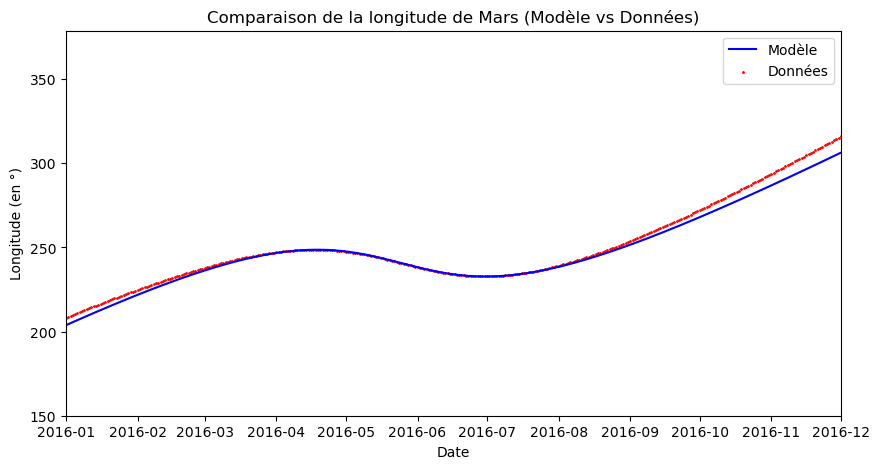

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(dates_data, phi_deg, label="Modèle", color="blue") # on trace les dates en fonction de la longitude de Mars
plt.scatter(dates_data, longitude_data, label="Données", color="red", s=1)
plt.xlim(np.datetime64("2016-01"), np.datetime64("2016-12")) #on ajoute une limite pour restreintre le graphique à l'année 2016
plt.xlabel("Date")
plt.ylabel("Longitude (en °)")
plt.ylim(150)                   
plt.title("Comparaison de la longitude de Mars (Modèle vs Données)")
plt.legend()
plt.show()

On a obtenu un graphique cohérent avec deux courbes très proches, on remarque que la courbe des données est légérement supérieure cela peut être du à la précision des instruments qui ont permis de réaliser ces mesures expérimentales